# 911 Calls: Progetto Portfolio

In questo progetto portfolio verrà analizzato un dataset di chiamate al 911 preso da [Kaggle](https://www.kaggle.com/mchirico/montcoalert). Lo scopo principale del progetto è compiere un po' di **Exploratory Data Analysis (EDA)**: **Data Analysis** e **Data Visualization** basilari su un set di dati del mondo reale.

I dati contengono i seguenti campi di informazione:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Importare librerie 

In [1]:
# Importo le librerie per la data analysis
import numpy as np
import pandas as pd

# Importo le librerie per la data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid') # imposto uno stile dei grafici che sia ben leggibile 
# Faccio in modo che i plot siano visibili nel corso del notebook
%matplotlib inline 

## Ottenere i dati

In [2]:
calls_911 = pd.read_csv('911.csv') # prendo il dataset sotto forma di Pandas DataFrame

Controllo le informazioni di base del dataset.

In [3]:
calls_911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
calls_911.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
calls_911.isnull().sum() # ci sono dei Missing Data

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [6]:
(calls_911.isnull().sum()/len(calls_911))*100 # percentuale di Missing Data nel dataset

lat           0.000000
lng           0.000000
desc          0.000000
zip          12.920637
title         0.000000
timeStamp     0.000000
twp           0.043220
addr          0.521650
e             0.000000
dtype: float64

Si potrebbero usare le feature 'lat' e 'lng' per inferire tutti i Missing Data, dato che zipcode, township e address sono tutte feature relative alla località da cui parte la chiamata al 911. Ma non è lo scopo di questo progetto.

In [7]:
calls_911 = calls_911.drop('e',axis=1) # scarto l'inutile colonna 'e'

## Analisi basilare

Quali sono le prime 20 township/giurisdizioni per numero di chiamate al 911?

In [8]:
calls_911['twp'].value_counts().head(20)

LOWER MERION         8443
ABINGTON             5977
NORRISTOWN           5890
UPPER MERION         5227
CHELTENHAM           4575
POTTSTOWN            4146
UPPER MORELAND       3434
LOWER PROVIDENCE     3225
PLYMOUTH             3158
HORSHAM              3003
MONTGOMERY           2698
UPPER DUBLIN         2638
WHITEMARSH           2526
UPPER PROVIDENCE     2313
LIMERICK             2272
SPRINGFIELD          2202
WHITPAIN             2135
EAST NORRITON        2038
LANSDALE             1743
HATFIELD TOWNSHIP    1732
Name: twp, dtype: int64

Quali sono i primi 10 zipcode per numero di chiamate al 911?

In [9]:
calls_911['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

Su 99492 chiamate quante di queste sono state fatte per motivi differenti?

In [10]:
calls_911['title'].nunique()

110

## Feature Engineering di base

Dal nostro dataset è possibile estrarre altre informazioni utilizzando le feature già presenti.

Dalla colonna 'title' si può inferire la ragione per cui è stata fatta la chiamata: servizio di medicina d'urgenza (EMS), vigili del fuoco (Fire) o incidenti stradali (Traffic). Si riporta questa informazione in una nuova colonna 'Reason'.

La colonna 'timeStamp', invece, sintetizza in sé l'anno , il mese, il giorno e l'orario della chimata al 911. Queste informazioni possono essere utili per indagare una possibile correlazione fra le chiamate e il periodo dell'anno o il giorno della settimana o l'orario della giornata.

In [11]:
calls_911['Reason'] = calls_911['title'].apply(lambda s: s.split(':')[0])
calls_911['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

A questo punto è possibile verificare e visualizzare quale ragione porta al maggior numero di chiamate al 911 nel nostro dataset.

In [12]:
calls_911['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

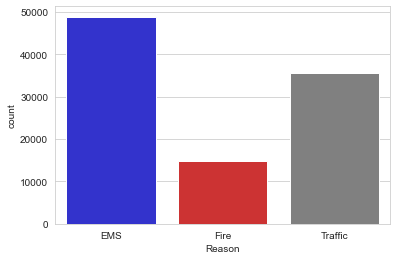

In [13]:
sns.countplot(data=calls_911,x='Reason',palette={'EMS':'blue','Fire':'red','Traffic':'gray'},
              saturation=0.6)

Come spesso accade con le informazioni relative al 'tempo', bisogna capire di che tipo siano riportate nei dataset.

In [14]:
type(calls_911['timeStamp'][0]) # in questo caso sono stringhe

str

Vanno manipolate per ottenere degli oggetti più facilmente lavorabili.

In [15]:
# Converto le stringhe in oggetti DateTime
calls_911['timeStamp'] = pd.to_datetime(calls_911['timeStamp']) 
type(calls_911['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

Da questo oggetto è possibile estrarre le tipiche informazioni del tempo tramite una gran varietà di metodi che Python mette a disposizione.

In [16]:
calls_911['Hour'] = calls_911['timeStamp'].apply(lambda hour: hour.hour)
calls_911['Month'] = calls_911['timeStamp'].apply(lambda month: month.month)
calls_911['Day of Week'] = calls_911['timeStamp'].apply(lambda day: day.day_of_week)

In [17]:
calls_911['Day of Week'].head() # i giorni sono degli interi, vanno rimappati per leggibilità

0    3
1    3
2    3
3    3
4    3
Name: Day of Week, dtype: int64

In [18]:
day_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [19]:
calls_911['Day of Week'] = calls_911['Day of Week'].map(day_map)

In [20]:
calls_911['Day of Week'].head()

0    Thu
1    Thu
2    Thu
3    Thu
4    Thu
Name: Day of Week, dtype: object

## Data Analysis & Data Visualization

Si utilizzano le nuove feature per analizzare il dataset più approfonditamente.

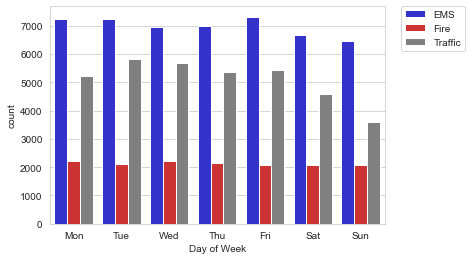

In [25]:
sns.countplot(x='Day of Week',data=calls_911,hue='Reason',
              order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],
              palette={'EMS':'blue','Fire':'red','Traffic':'gray'},saturation=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # sposto la legenda fuori dal plot

**Si può notare che durante il fine settimana le chiamate al 911 per incidenti stradali diminuiscono, come è intuitivo che sia. Più sorprendentemente anche le chiamate per il servizio di medicina d'urgenza hanno una leggera flessione nel weekend, al contrario di quelle per i vigili del fuoco.**

Si prova la stessa analisi per i mesi.

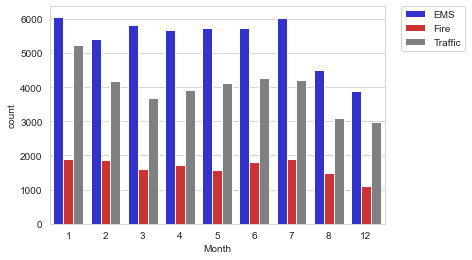

In [27]:
sns.countplot(x='Month',data=calls_911,hue='Reason',
              palette={'EMS':'blue','Fire':'red','Traffic':'gray'},saturation=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) # sposto la legenda fuori dal plot

**Si noti che mancano alcuni mesi dell'anno: settembre, ottobre e novembre.**

Questa volta si prova un'analisi più dettagliata e meno visiva. Si indaga la correlazione tra il numero delle chiamate e il mese dell'anno.

In [31]:
byMonth = calls_911.groupby('Month').count() # raggruppo il dataset per mese e seleziono il conteggio
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reason,Hour,Day of Week
Month,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423


Text(0, 0.5, 'Numero di chiamate')

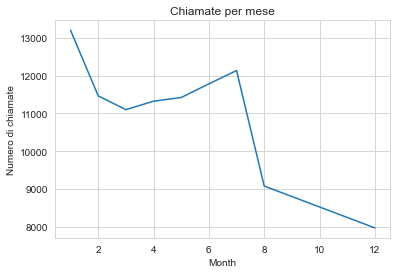

In [34]:
byMonth['lat'].plot() # una colonna a caso (senza Missing Data)

plt.title('Chiamate per mese')
plt.xlabel('Month')
plt.ylabel('Numero di chiamate')

**Anche senza alcuni mesi nel dataset si può vedere come sembra esserci una diminuzione nelle chiamate al 911 alla fine dell'anno/festività in USA.**

Si verifica quest'affermazione con una regressione lineare, usando la libreria Seaborn.

Text(5.674999999999997, 0.5, 'Numero di chiamate')

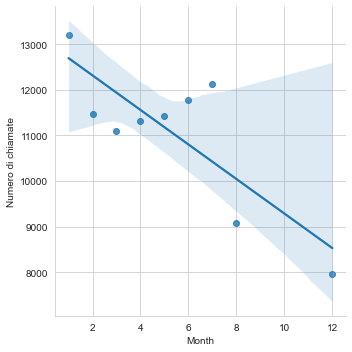

In [33]:
sns.lmplot(x='Month',y='lat',data=byMonth.reset_index())

plt.xlabel('Month')
plt.ylabel('Numero di chiamate')

**L'analisi statistica integrata nel metodo lmplot di Seaborn sembrerebbe confermare (bisognerebbe vedere la bontà del fit) la decrescita nel periodo delle festività. Si potrebbe inferire il numero di chiamate nei mesi mancanti.**

Si estrae la data dalla colonna 'timeStamp' per analizzare l'andamento delle chiamate ancora più nel dettaglio.

In [35]:
calls_911['Date'] = calls_911['timeStamp'].apply(lambda t: t.date())

In [38]:
calls_911['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

Si analizza l'andamento delle chiamate per data.

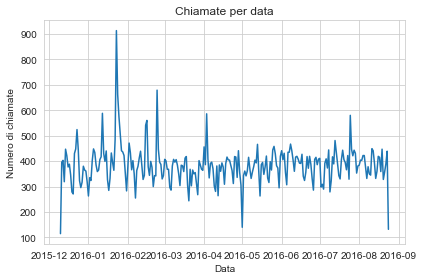

In [40]:
calls_911.groupby('Date').count()['lat'].plot()

plt.title('Chiamate per data')
plt.ylabel('Numero di chiamate')
plt.xlabel('Data')
plt.tight_layout()

**Il numero di chiamate oscilla attorno ad un valore medio, salvo per il normale 'rumore' stocastico, MA sono presenti dei picchi e delle buche non indifferenti. Si potrebbe andare a controllare cosa è successo nella zona in cui è stato raccolto il dataset in quelle date per cercare di capire il motivo del grande scostamento dal valore medio.**

Si analizza la stessa cosa ma per le tre differenti ragioni delle chiamate al 911.

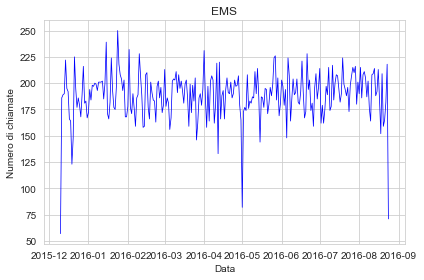

In [58]:
calls_911[calls_911['Reason'] == 'EMS'].groupby('Date').count()['lat'].plot(color='blue',
                                                                             linewidth=0.75)

plt.title('EMS')
plt.ylabel('Numero di chiamate')
plt.xlabel('Data')
plt.tight_layout()

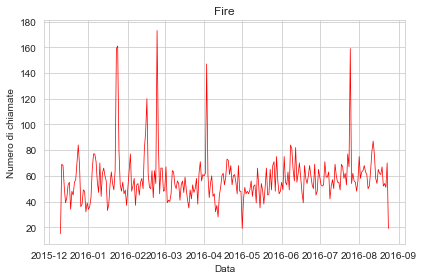

In [48]:
calls_911[calls_911['Reason'] == 'Fire'].groupby('Date').count()['lat'].plot(color='red',
                                                                             linewidth=0.75)

plt.title('Fire')
plt.ylabel('Numero di chiamate')
plt.xlabel('Data')
plt.tight_layout()

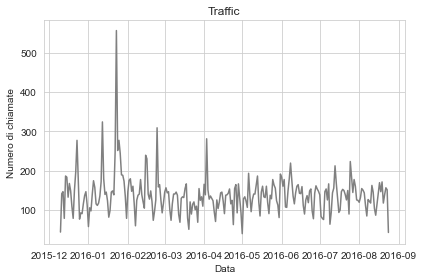

In [52]:
calls_911[calls_911['Reason'] == 'Traffic'].groupby('Date').count()['lat'].plot(color='gray',
                                                                             linewidth=1.5)

plt.title('Traffic')
plt.ylabel('Numero di chiamate')
plt.xlabel('Data')
plt.tight_layout()

Ora si indaga la correlazione tra le ore del giorno e il giorno della settimana per numero di chiamate al 911, usando le heatmap. A questo scopo si deve modellare il dataset così da avere una sorta di matrice (giorno X ore), si può fare con i metodi groupby e unstack o con il metodo pivot_table.

In [82]:
dayHour.iloc[1] # 'Mon'
dayHour.iloc[5] # 'Tue'
dayHour.iloc[6] # 'Wed'
dayHour.iloc[4] # 'Thu'
dayHour.iloc[0] # 'Fri'
dayHour.iloc[2] # 'Sat'
dayHour.iloc[3] # 'Sun'

Hour
0     383
1     306
2     286
3     268
4     242
5     240
6     300
7     402
8     483
9     620
10    643
11    693
12    771
13    679
14    684
15    691
16    663
17    714
18    670
19    655
20    537
21    461
22    415
23    330
Name: Sun, dtype: int64

In [78]:
dayHour = calls_911.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


Voglio ordinare i giorni della settimana.

In [94]:
day_hour = pd.DataFrame(data=[dayHour.iloc[1],
                              dayHour.iloc[5],
                              dayHour.iloc[6],
                              dayHour.iloc[4],
                              dayHour.iloc[0],
                              dayHour.iloc[2],
                              dayHour.iloc[3]],
                        index=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
day_hour.index.name = 'Day of Week'
day_hour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330


<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

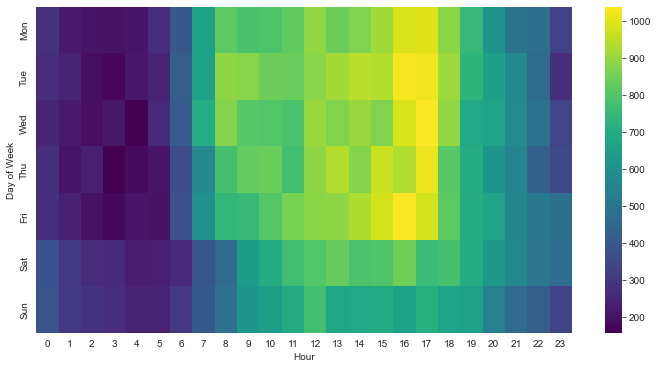

In [95]:
plt.figure(figsize=(12,6))
sns.heatmap(day_hour,cmap='viridis')

**Oltre a notare che nelle ore notturne le chiamate sono molto meno rispetto alle ore in cui si è svegli, come è intuitivo che sia, avendo riordinato i giorni della settimana si nota la tendenza vista precedentemente. Nel fine settimana il numero di chiamate diminuiscee in generale si concentrano a mezzogiorno. Nei giorni feriali il maggior numero di chiamate si ha verso la fine delle ore lavorative.**

Si lascia analizzare le correlazioni principali fra le righe e le colonne tramite le clustermap.

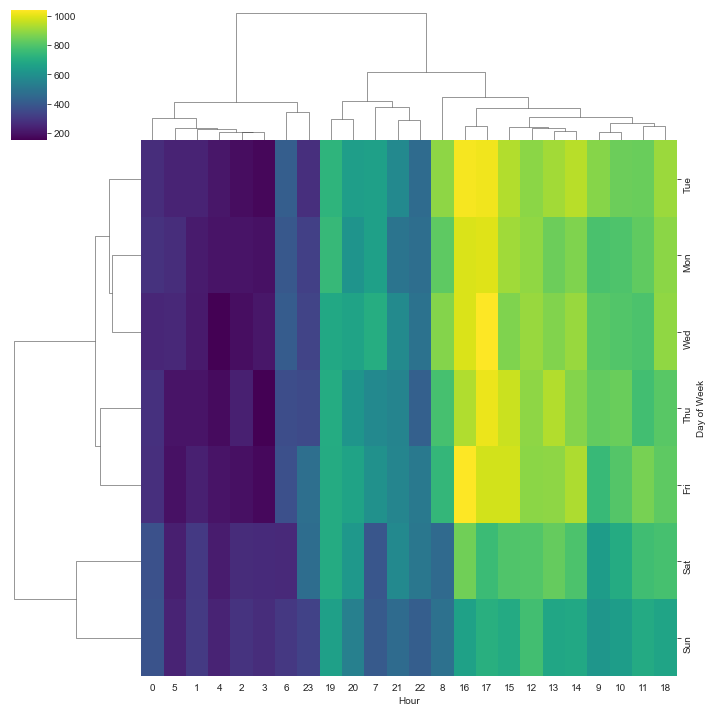

In [97]:
sns.clustermap(day_hour,cmap='viridis')

**Come si era intuito i principali gruppi di correlazione sono i giorni feriali e quelli del fine settimana, mentre per le ore del giorno si hanno tre gruppi: le ore notturne (0-5,6 e 23), le ore lavorative 'canoniche' (8-18) e quelle 'fuori dal lavoro' (7 e 19-22).**

E qui si conclude il progetto di Exploratory Data Analysis (EDA) con dati reali.